In [37]:
# Predicting medical insurance costs 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [39]:
df = pd.read_csv('insurance.csv')

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
# getting dataset shape
df.shape

(1338, 7)

In [42]:
# getting summary info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [43]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [44]:
# for label in df.columns[1:]:
#     plt.scatter(df[label], df['charges'])
#     plt.title(label)
#     plt.xlabel(label)
#     plt.ylabel('insurance charges')
#     plt.show()

In [45]:
# Data analysis - getting statistical data from the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\yadav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

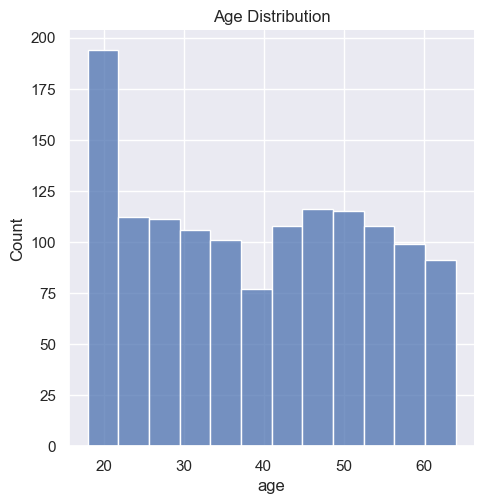

In [72]:
# find distribution of age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

# we can conclude that a lot of the dataset focuses on the youth (around 20)

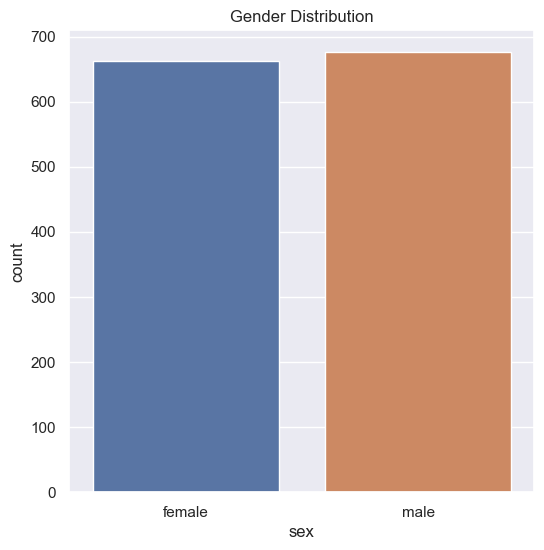

In [47]:
# Plotting the distribution of gender column
plt.figure(figsize=(6,6))

# the countplot gives number of values for each category in the column
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()


In [48]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

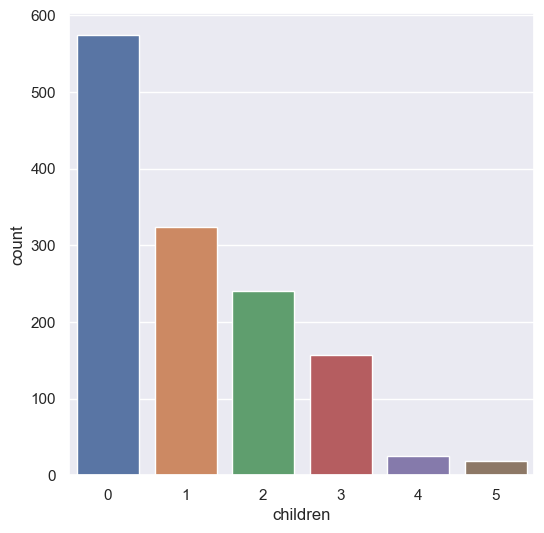

In [49]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.show()

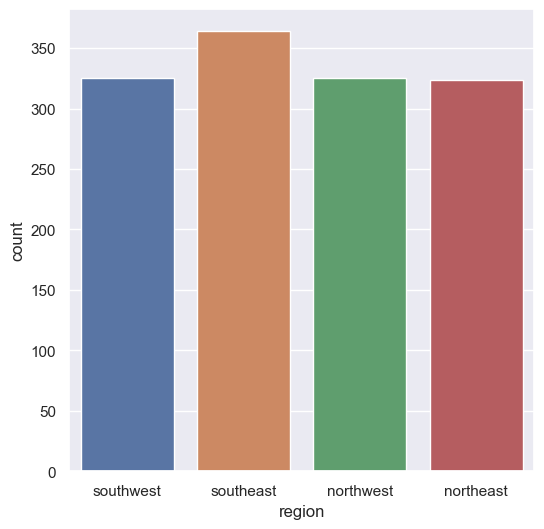

In [50]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.show()

c:\Users\yadav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

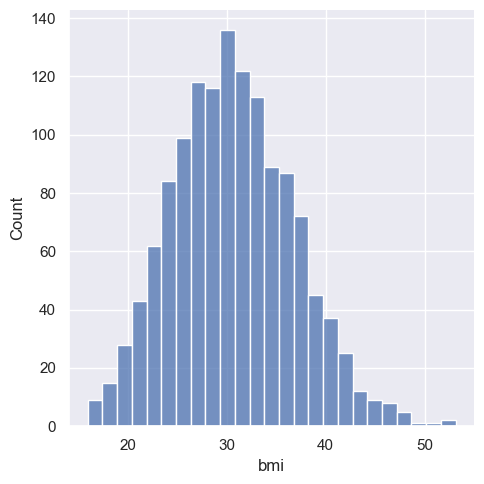

In [51]:
plt.figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.show()

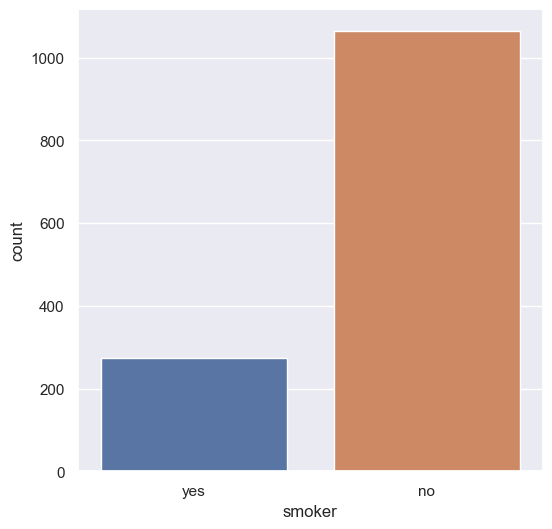

In [52]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.show()

c:\Users\yadav\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

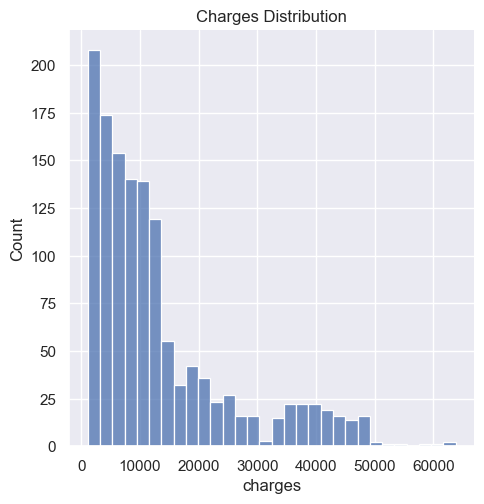

In [53]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [54]:
# Data pre-processing

# encoding the gender and smoker columns
df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
df['smoker'] = (df['smoker'] == "yes").astype(int)

# encoding region column - we have 4 regions
df.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)


In [55]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [56]:
# all columns in the dataset are now numerical and can be used in the model

In [57]:
# Setting the features and label
X = df.drop(['charges'], axis=1)
y = df['charges']

In [58]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,2
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [59]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)

In [61]:
# Training the model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
# model evaluation

training_data_pred = model.predict(X_train)

In [63]:
# R^2 value to evaluate - closer to 1 means values are close to original values
r2_train = metrics.r2_score(y_train, training_data_pred)

In [64]:
r2_train

0.751505643411174

In [65]:
test_data_pred = model.predict(X_test)

In [66]:
r2_test = metrics.r2_score(y_test, test_data_pred)

In [67]:
r2_test

0.7447273869684077

In [68]:
# building a predictive system - to predict the insurance cost given the features
input_data = (31,1,25.74,0,0,0)

# converting this tuple to a numpy array
input_data_array = np.asarray(input_data)

# need to reshape this array
input_data_array_reshaped = input_data_array.reshape(1, -1)


In [69]:
input_data_pred = model.predict(input_data_array_reshaped)

c:\Users\yadav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [70]:
input_data_pred

array([3760.0805765])